#  DS PROJECT : Codon Usage : Additional Model Implementations

**GROUP 1**
1. Suvarna Sangram Aglave (2404343)
2. Sanika Nirmal Sahuji (2400145)
3. Kush Rakesh Mehta (2393362)
4. Keerthana Baithini (2382814)

In [249]:
#imports all essential libraries for data manipulation, visualization, and preprocessing.
import numpy as np
import pandas as pd

import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

from hpelm import ELM
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.preprocessing import OneHotEncoder

from rich import print
from xgboost import XGBClassifier
import xgboost as xgb
warnings.filterwarnings("ignore")

In [251]:
#read dataset from cleaned csv fie
# setting low_memory=False because it disables the memory optimization and makes pandas read the entire dataset.
df = pd.read_csv('Group_1_Bi_Directional_Elimination_Data.csv', low_memory=False)
df.head()

,Kingdom,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,9,0.01654,0.00351,0.00100,0.013201,0.00551,0.02005,0.00752,0.02506,0.00902,...,0.01153,0.02356,0.01053,0.00401,0.00401,0.00451,0.006101,0.01203,0.00050,0.00000
1,9,0.02714,0.00678,0.00204,0.013201,0.01153,0.02510,0.00882,0.03324,0.00814,...,0.01628,0.01967,0.00543,0.00136,0.00136,0.00136,0.006101,0.01560,0.00068,0.00000
2,9,0.01974,0.01543,0.01028,0.011930,0.02283,0.01604,0.01316,0.02180,0.01213,...,0.01234,0.01687,0.02077,0.00864,0.00926,0.00596,0.006101,0.02242,0.00000,0.00144
3,9,0.01775,0.00992,0.00940,0.017230,0.02402,0.02245,0.02507,0.02924,0.01723,...,0.00888,0.00679,0.03133,0.00627,0.00261,0.00366,0.016710,0.03029,0.00157,0.00000
4,9,0.02816,0.03679,0.00473,0.020760,0.02716,0.00867,0.01310,0.02773,0.00920,...,0.00705,0.00858,0.03408,0.00950,0.00578,0.00604,0.017340,0.03359,0.00044,0.00131


### Part: 4.5 - Implementing additional models after feature selection and elimination

In [254]:
#split data into input and output
y = df['Kingdom']
numerical_cols = df.select_dtypes(include=np.number).columns
X = df[numerical_cols[1:]]

In [256]:
X.head()

,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,GCC,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,0.01654,0.00351,0.00100,0.013201,0.00551,0.02005,0.00752,0.02506,0.00902,0.05013,...,0.01153,0.02356,0.01053,0.00401,0.00401,0.00451,0.006101,0.01203,0.00050,0.00000
1,0.02714,0.00678,0.00204,0.013201,0.01153,0.02510,0.00882,0.03324,0.00814,0.04885,...,0.01628,0.01967,0.00543,0.00136,0.00136,0.00136,0.006101,0.01560,0.00068,0.00000
2,0.01974,0.01543,0.01028,0.011930,0.02283,0.01604,0.01316,0.02180,0.01213,0.01234,...,0.01234,0.01687,0.02077,0.00864,0.00926,0.00596,0.006101,0.02242,0.00000,0.00144
3,0.01775,0.00992,0.00940,0.017230,0.02402,0.02245,0.02507,0.02924,0.01723,0.00679,...,0.00888,0.00679,0.03133,0.00627,0.00261,0.00366,0.016710,0.03029,0.00157,0.00000
4,0.02816,0.03679,0.00473,0.020760,0.02716,0.00867,0.01310,0.02773,0.00920,0.00574,...,0.00705,0.00858,0.03408,0.00950,0.00578,0.00604,0.017340,0.03359,0.00044,0.00131


Shape of training data
(8337, 40)

Shape of validation data
(2085, 40)

Shape of test data
(2606, 40)

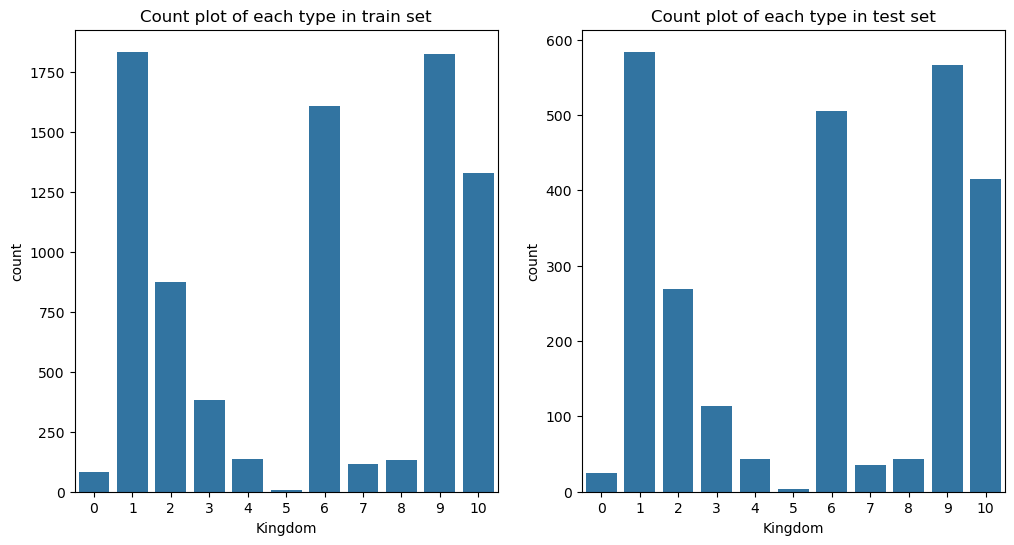

In [258]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, stratify = y, random_state = 40)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size = 0.8, random_state = 40)

print('Shape of training data', x_train.shape)
print('Shape of validation data', x_val.shape)
print('Shape of test data', x_test.shape)

fig = plt.figure(figsize=(12, 6))

plt.subplot(121)
sns.countplot(x = y_train)
plt.title('Count plot of each type in train set')

plt.subplot(122)
sns.countplot(x = y_test)
plt.title('Count plot of each type in test set' )


plt.show()

---
As we can see from above bar charts data is highly imbalanced we will first try to balance training data using SMOTE

---

Shape of training data
(20196, 40)

Shape of test data
(2606, 40)

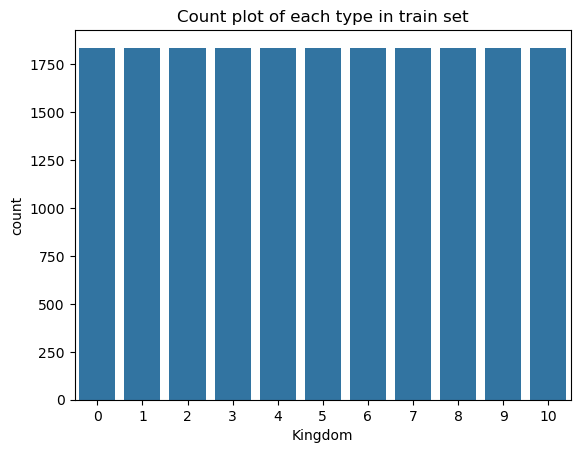

In [261]:
smt = SMOTE()
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)
x_train_smt = pd.DataFrame(x_train_smt, columns = x_train.columns)

print('Shape of training data', x_train_smt.shape)
print('Shape of test data', x_test.shape)

sns.countplot(x = y_train_smt)
plt.title('Count plot of each type in train set')
plt.show()

---
We can see that using SMOTE oversampling technique of data was used to balance data. Now we will standardize data.

---

In [264]:
#we will fit smote data on MinMaxScaler
minMaxScaler = MinMaxScaler()
x_train_mm = minMaxScaler.fit_transform(x_train_smt)
x_train_mm = pd.DataFrame(x_train_mm, columns = x_train_smt.columns)
x_val_mm = minMaxScaler.transform(x_val)
x_val_mm = pd.DataFrame(x_val_mm, columns=x_val.columns)
x_test_mm = minMaxScaler.transform(x_test)
x_test_mm = pd.DataFrame(x_test_mm, columns=x_test.columns)

---
 x_train_mm : this is train input,
<br> y_train_smt: this is train output,
<br> x_val_mm: this is validation input,
<br> y_val: this is validation output
<br> x_test_mm: this is test input,
<br> y_test: this is test output

---

### New Data Modelling

In [268]:
#define generic function to fit and predict model and print classification report and confusion matrix
def train_model(classifier, x_train, y_train, params):

    '''A function to fit machine learning model on training data
    Inputs:
        classifier: sklearn classifier class which you want the data to be trained on
        x_train: predictor variable for training set
        y_train: target variable for training set
        params: hyper-parameters to pass into the model.
    Output:
        fitted classifier on the data (i.e post training classifier)
    '''

    #================================================Train the model=================================================
    #fit the passed classifier
    clf = classifier(**params)
    clf.fit(x_train, y_train)

    return clf

#define generic function to predict model and print classification report and confusion matrix
def predict_and_report(clf, clf_name, x_train, y_train, x_test, y_test):

    '''A function to evaluate model performance with classification report and confusion matrix for both train and test set
    Inputs:
        clf: trained classifier on the data
        clf_name: classifier name for reporting
        x_train: predictor variable for training set
        y_train: target variable for training set
        x_test: predictor variable for test set
        y_test: target variable for test set
    '''

    print('\n\n******************************* Training Data Analysis *******************************')
    # predicting model on the train data and plot confusion matrix
    y_pred_train = clf.predict(x_train)

    print(f'[bold]Classification report of {clf_name} on training data is:[/bold]')
    print(classification_report(y_train, y_pred_train))
    print(f'[bold]Accuracy score of {clf_name} on training data is: {clf.score(x_train, y_train)}[/bold]')

    print('\n\n******************************* Test Data Analysis *******************************')
    # predicting model on the test data and plot confusion matrix
    y_pred_test = clf.predict(x_test)

    print(f'[bold]Classification report of {clf_name} on test data is:[/bold]')
    print(classification_report(y_test, y_pred_test))
    print(f'[bold]Accuracy score of {clf_name} on test data is: {clf.score(x_test, y_test)}[/bold]')

    # plot confusion matrix as heat map
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = pd.DataFrame(cm_train)
    cm_test = pd.DataFrame(cm_test)


    fig = plt.figure(figsize=(15, 5))

    plt.subplot(121)
    sns.heatmap(cm_train, annot=True, cmap="crest")
    plt.title('Confusion Matrix on train data')

    plt.subplot(122)
    sns.heatmap(cm_test, annot = True, cmap="flare")
    plt.title('Confusion Matrix on test data')
    plt.show()
    print()

    return y_pred_train, y_pred_test

In [270]:
#train 4 new models:
#XGBoost
#Extreme Learning Machine (ELM)
#A simple deep learning model with two layers and
#An ensemble model that combines the top 3 best-performing models

---
 x_train_mm : this is train input,
<br> y_train_smt: this is train output,
<br> x_val_mm: this is validation input,
<br> y_val: this is validation output
<br> x_test_mm: this is test input,
<br> y_test: this is test output

---

In [273]:
x_train_mm.head()

,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,GCC,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,0.172275,0.209100,0.121697,0.485698,0.140802,0.488543,0.056896,0.594298,0.070611,0.930809,...,0.399539,0.305500,0.162351,0.349776,0.213212,0.380021,0.216454,0.420290,0.293785,0.416380
1,0.668749,0.562599,0.535976,0.453274,0.645269,0.343856,0.333182,0.310916,0.519629,0.182604,...,0.193437,0.208249,0.623140,0.492825,0.413534,0.419162,0.110427,0.755026,0.096045,0.109948
2,0.212170,0.000000,0.621746,0.096762,0.876457,0.657506,0.538917,0.180312,0.717557,0.343505,...,0.454231,0.794098,0.386593,0.000000,0.848013,0.000000,0.000000,0.246065,0.000000,0.529937
3,0.647794,0.596791,0.981224,0.277410,0.609992,0.430843,0.611743,0.577973,0.515267,0.127285,...,0.158319,0.209256,0.657300,0.607623,0.743824,0.441118,0.302244,0.597631,0.587571,0.429319
4,0.442176,0.900842,0.285814,0.201619,0.407142,0.388826,0.992490,0.255117,0.597601,0.018603,...,0.000000,0.000000,0.297704,0.338050,0.012352,0.000000,0.783546,0.426991,0.000000,0.460600


In [275]:
y_train_smt.head()

0    1
1    1
2    3
3    6
4    2
Name: Kingdom, dtype: int64

In [277]:
x_val_mm.head()

,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,GCC,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,0.442176,0.599947,0.517727,0.481972,0.594852,0.335907,0.471097,0.615984,0.426118,0.117167,...,0.486471,0.368209,0.287052,0.360090,0.589689,0.421158,0.055873,0.329126,0.474576,0.529937
1,0.201088,0.131247,0.277469,0.660780,0.151098,0.974563,0.000000,0.741959,0.136041,0.439785,...,0.390113,0.635815,0.238200,0.313453,0.107411,0.498004,0.351078,0.202119,0.255108,0.460600
2,0.266774,0.428722,0.330320,0.562178,0.210749,0.547581,0.185480,0.310673,0.222192,0.410085,...,0.742660,0.421194,0.486501,0.502691,0.455961,0.575848,0.388473,0.407511,0.384181,0.534031
3,0.278259,0.394792,0.166898,0.485698,0.354428,0.886214,0.068275,0.646199,0.130862,0.382017,...,0.656304,0.624078,0.451974,0.349776,0.096670,0.059880,0.554773,0.336762,0.338983,0.000000
4,0.622003,0.029458,0.621746,0.250552,0.868282,0.804906,0.354171,0.258528,0.737186,0.302872,...,0.488774,0.422200,0.285950,0.108520,0.605800,0.000000,0.000000,0.588593,0.000000,0.529937


In [279]:
y_val.head()

9846      2
9920      2
1092      9
10771    10
12897     7
Name: Kingdom, dtype: int64

In [281]:
x_test_mm.head()

,UUU,UUG,CUA,CUG,AUU,AUC,AUA,AUG,GUA,GCC,...,UGC,CAC,AAA,CGU,CGA,CGG,AGG,GAA,UAG,UGA
0,0.015515,0.040505,0.053547,0.485698,0.046783,0.780150,0.000000,0.251462,0.084242,0.358131,...,0.444444,0.388330,0.014141,0.380717,0.186359,0.338630,0.407391,0.072152,0.0,0.806283
1,0.562361,0.430300,0.513407,0.318617,0.437093,0.546446,0.109467,0.621345,0.839695,0.219811,...,0.110535,0.129108,0.653994,0.949327,0.568743,0.191617,0.084470,0.884993,0.0,0.460600
2,0.442176,0.352446,0.574910,0.017660,0.407142,0.619805,0.373915,0.221248,0.443839,0.109334,...,0.109960,0.208585,0.501194,0.150224,0.462943,0.190619,0.000000,0.208820,0.0,0.529937
3,0.320371,0.278801,0.737135,0.947020,0.137472,0.481490,0.103323,0.633772,0.288986,0.444680,...,0.435809,0.482227,0.417080,0.339462,0.325456,0.226547,0.133304,0.365747,0.0,0.397906
4,0.263550,0.476328,0.574910,0.423590,0.194247,0.405633,0.698225,0.527290,0.658124,0.316090,...,0.535982,0.438632,0.725253,0.056502,0.135338,0.225549,0.268426,0.529063,0.0,0.130890


In [283]:
y_test.head()

3865    1
6379    6
8807    2
8762    2
1101    9
Name: Kingdom, dtype: int64

### Model 1: XGBoost

In [286]:
#pip install xgboost

In [288]:
# Initialize the XGBoost Classifier for multiclass
params=dict(
    objective='multi:softmax',  # Use 'multi:softprob' if you want probabilities
    num_class=11,               # Number of classes (0 to 10)
    use_label_encoder=False,
    eval_metric='mlogloss',     # Suitable for multiclass classification
    random_state=42
)
xgb_model=train_model(XGBClassifier, x_train_mm, y_train_smt, params)

<Figure size 1000x800 with 0 Axes>

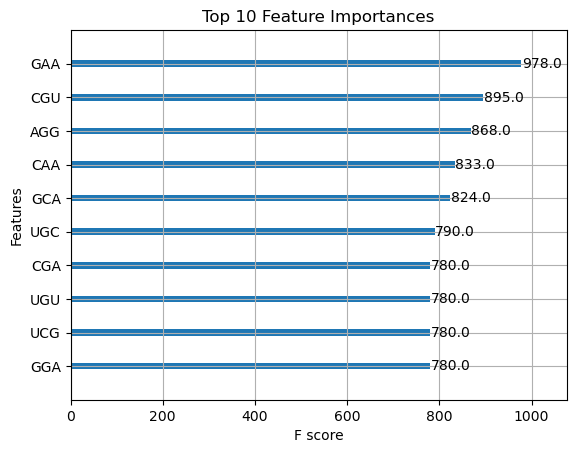

In [289]:
#Feature Importance
plt.figure(figsize=(10, 8))
xgb.plot_importance(xgb_model, max_num_features=10)  # Show top 10 features
plt.title('Top 10 Feature Importances')
plt.show()

### Model 1: XGBoost evaluation

******************************* Training Data Analysis *******************************

Classification report of XGBClassifier on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00      1836
           2       1.00      1.00      1.00      1836
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1836
           5       1.00      1.00      1.00      1836
           6       1.00      1.00      1.00      1836
           7       1.00      1.00      1.00      1836
           8       1.00      1.00      1.00      1836
           9       1.00      1.00      1.00      1836
          10       1.00      1.00      1.00      1836

    accuracy                           1.00     20196
   macro avg       1.00      1.00      1.00     20196
weighted avg       1.00      1.00      1.00     20196

Accuracy score of XGBClassifier on training data is: 1.0

******************************* Test Data Analysis *******************************

Classification report of XGBClassifier on test data is:

precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.92      0.93      0.93       584
           2       0.77      0.79      0.78       269
           3       0.87      0.81      0.84       114
           4       0.85      0.75      0.80        44
           5       0.00      0.00      0.00         4
           6       0.90      0.87      0.88       505
           7       0.85      0.81      0.83        36
           8       0.73      0.63      0.68        43
           9       0.90      0.93      0.92       567
          10       0.92      0.94      0.93       415

    accuracy                           0.89      2606
   macro avg       0.78      0.75      0.76      2606
weighted avg       0.89      0.89      0.89      2606

Accuracy score of XGBClassifier on test data is: 0.887567152724482

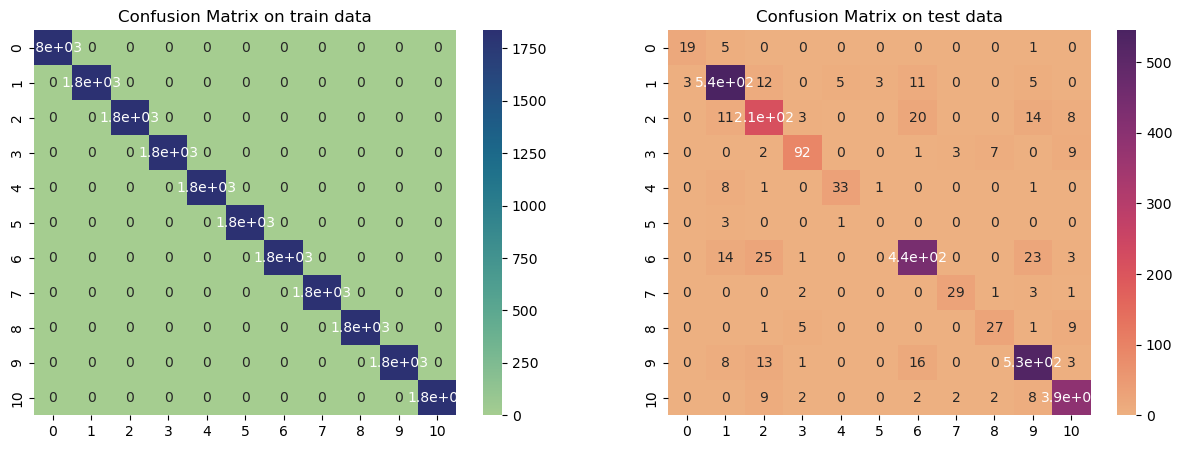

In [293]:
xgb_train_pred, xgb_test_pred = predict_and_report(xgb_model, 'XGBClassifier', x_train_mm, y_train_smt, x_test_mm, y_test)

### Model 2: Extreme Learning Machine (ELM)

In [296]:
#pip install hpelm

In [392]:
# Define ELM model
def train_elm(x_train, y_train, x_test, y_test, n_neurons, activation_function="sigm"):

    '''Train and evaluate an Extreme Learning Machine (ELM) model.
    Inputs:
        x_train: Predictor variables for training set
        y_train: Target variables for training set (should be encoded as integers)
        x_test: Predictor variables for test set
        y_test: Target variables for test set (should be encoded as integers)
        n_neurons: Number of hidden neurons in the ELM
        activation_function: Activation function for the ELM (e.g., 'sigm', 'tanh')
    Output:
        None (prints performance metrics and confusion matrices)
    '''

    # Convert y_train and y_test to integers if not already
    if not np.issubdtype(y_train.dtype, np.integer):
        y_train = y_train.astype(int)
    if not np.issubdtype(y_test.dtype, np.integer):
        y_test = y_test.astype(int)

    # One-hot encode the target variables
    enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for ELM
    y_train_encoded = enc.fit_transform(y_train.reshape(-1, 1))
    y_test_encoded = enc.transform(y_test.reshape(-1, 1))
    print("y_train_encoded", y_train_encoded.shape)
    print("y_test_encoded", y_test_encoded.shape)


    # Initialize ELM
    elm = ELM(x_train.shape[1], y_train_encoded.shape[1], classification="c")  # Use encoded shape

    # Add hidden neurons
    elm.add_neurons(n_neurons, activation_function)

    # Train ELM
    elm.train(x_train, y_train_encoded, "c")  # Use encoded target

    # Predict
    y_train_pred = elm.predict(x_train)
    y_test_pred = elm.predict(x_test)

    # Evaluate Performance
    print("\n[Train] Classification Report")
    print(classification_report(y_train, np.argmax(y_train_pred, axis=1)))

    print("\n[Test] Classification Report")
    print(classification_report(y_test, np.argmax(y_test_pred, axis=1)))

    print(f"Training Accuracy: {accuracy_score(y_train, np.argmax(y_train_pred, axis=1))}")
    print(f"Testing Accuracy: {accuracy_score(y_test, np.argmax(y_test_pred, axis=1))}")

    # Plot confusion matrices
    cm_train = confusion_matrix(y_train, np.argmax(y_train_pred, axis=1))
    cm_test = confusion_matrix(y_test, np.argmax(y_test_pred, axis=1))

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.heatmap(cm_train, annot=True, cmap="crest", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    sns.heatmap(cm_test, annot=True, cmap="flare", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    plt.show()


### Model 2: Extreme Learning Machine (ELM) evaluation

y_train_encoded
(20196, 11)

y_test_encoded
(2606, 11)

[Train] Classification Report

precision    recall  f1-score   support

           0       0.85      0.97      0.90      1836
           1       0.75      0.67      0.71      1836
           2       0.72      0.58      0.64      1836
           3       0.76      0.68      0.72      1836
           4       0.85      0.81      0.83      1836
           5       0.81      1.00      0.90      1836
           6       0.73      0.69      0.71      1836
           7       0.67      0.83      0.74      1836
           8       0.79      0.75      0.77      1836
           9       0.71      0.78      0.74      1836
          10       0.83      0.71      0.76      1836

    accuracy                           0.77     20196
   macro avg       0.77      0.77      0.77     20196
weighted avg       0.77      0.77      0.77     20196

[Test] Classification Report

precision    recall  f1-score   support

           0       0.20      0.84      0.33        25
           1       0.85      0.66      0.75       584
           2       0.55      0.54      0.54       269
           3       0.68      0.56      0.62       114
           4       0.31      0.80      0.45        44
           5       0.02      0.50      0.04         4
           6       0.77      0.67      0.71       505
           7       0.24      0.78      0.37        36
           8       0.34      0.67      0.45        43
           9       0.79      0.74      0.76       567
          10       0.88      0.67      0.76       415

    accuracy                           0.67      2606
   macro avg       0.51      0.68      0.53      2606
weighted avg       0.75      0.67      0.70      2606

Training Accuracy: 0.7694592988710636

Testing Accuracy: 0.6696085955487336

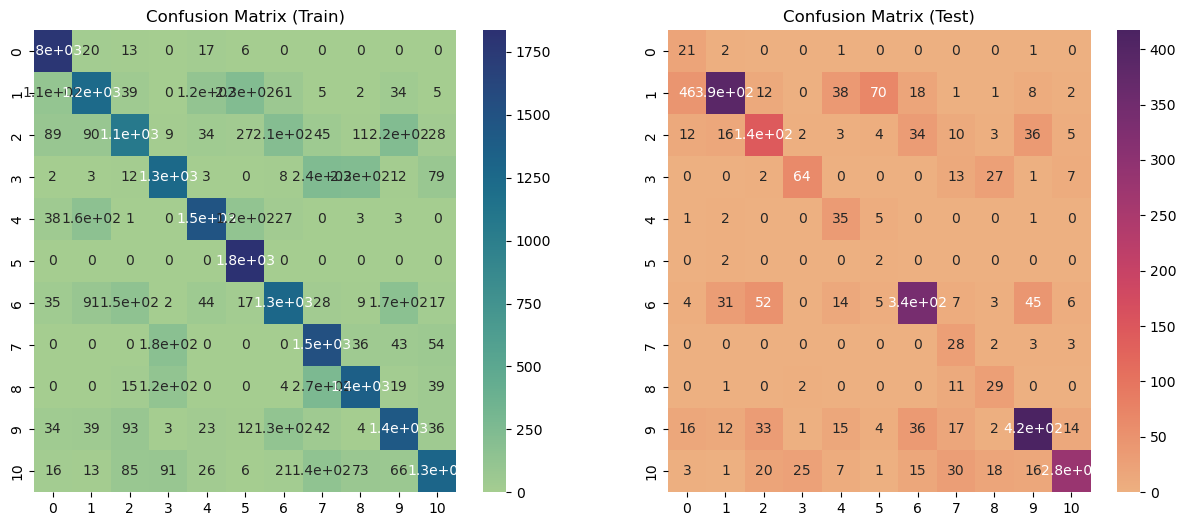

In [395]:
# Train and evaluate ELM
train_elm(x_train_mm.values, y_train_smt.values, x_test_mm.values, y_test.values, n_neurons=100, activation_function="sigm")

### Model 3: A simple deep learning model with two layers

In [304]:
# Define the Deep Learning Model
def build_deep_model(input_dim, num_classes, hidden_units=64, dropout_rate=0.2, learning_rate=0.001):
    '''Builds a simple deep learning model with two dense layers.
    Inputs:
        input_dim: Number of input features
        num_classes: Number of output classes
        hidden_units: Number of neurons in the hidden layer
        dropout_rate: Dropout rate for regularization
        learning_rate: Learning rate for optimizer
    Output:
        Compiled Keras model
    '''
    model = Sequential([
        Dense(hidden_units, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate),
        Dense(hidden_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [306]:
# Train the Model
def train_deep_model(model, x_train, y_train, x_val, y_val, epochs=30, batch_size=32):
    '''Trains the deep learning model.
    Inputs:
        model: Compiled Keras model
        x_train: Training features
        y_train: Training labels
        x_val: Validation features
        y_val: Validation labels
        epochs: Number of training epochs
        batch_size: Batch size for training
    Output:
        Trained model and training history
    '''
    history = model.fit(x_train, y_train,
                        validation_data=(x_val, y_val),
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1)
    return model, history

In [308]:
# Evaluate the Model
def evaluate_deep_model(model, x_train, y_train, x_test, y_test):
    '''Evaluates the deep learning model on training and test sets.
    Inputs:
        model: Trained Keras model
        x_train: Training features
        y_train: Training labels
        x_test: Test features
        y_test: Test labels
    Output:
        None (prints classification reports and plots confusion matrices)
    '''
    # Predict on train and test data
    y_train_pred = np.argmax(model.predict(x_train), axis=1)
    y_test_pred = np.argmax(model.predict(x_test), axis=1)

    # Evaluate training data
    print("\n******************************* Training Data Analysis *******************************")
    print("[Train] Classification Report")
    print(classification_report(y_train, y_train_pred))
    print(f"Training Accuracy: {accuracy_score(y_train, y_train_pred)}")

    # Evaluate test data
    print("\n******************************* Test Data Analysis *******************************")
    print("[Test] Classification Report")
    print(classification_report(y_test, y_test_pred))
    print(f"Testing Accuracy: {accuracy_score(y_test, y_test_pred)}")

    # Confusion matrices
    cm_train = confusion_matrix(y_train, y_train_pred)
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Plot confusion matrices
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.heatmap(cm_train, annot=True, fmt="d", cmap="crest", ax=axes[0])
    axes[0].set_title("Confusion Matrix (Train)")
    axes[0].set_xlabel("Predicted")
    axes[0].set_ylabel("Actual")

    sns.heatmap(cm_test, annot=True, fmt="d", cmap="flare", ax=axes[1])
    axes[1].set_title("Confusion Matrix (Test)")
    axes[1].set_xlabel("Predicted")
    axes[1].set_ylabel("Actual")

    plt.tight_layout()
    plt.show()

In [310]:
# Integrating and running the model

# Build the model
input_dim = x_train_mm.shape[1]
num_classes = len(np.unique(y_train_smt))
model = build_deep_model(input_dim=input_dim, num_classes=num_classes, hidden_units=64, dropout_rate=0.2, learning_rate=0.001)

# Train the model
model, history = train_deep_model(model, x_train_mm.values, y_train_smt.values, x_val_mm.values, y_val.values, epochs=10, batch_size=32)

Epoch 1/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step - accuracy: 0.3396 - loss: 1.8616 - val_accuracy: 0.6293 - val_loss: 1.0908
Epoch 2/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.6417 - loss: 1.0001 - val_accuracy: 0.6878 - val_loss: 0.8982
Epoch 3/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 287us/step - accuracy: 0.7096 - loss: 0.8214 - val_accuracy: 0.7094 - val_loss: 0.8379
Epoch 4/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 258us/step - accuracy: 0.7326 - loss: 0.7360 - val_accuracy: 0.7194 - val_loss: 0.7845
Epoch 5/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.7658 - loss: 0.6684 - val_accuracy: 0.7199 - val_loss: 0.7856
Epoch 6/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 257us/step - accuracy: 0.7775 - loss: 0.6330 - val_accuracy: 0.7472 - val_loss: 0.7247
Epoch 7/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.7910 - loss: 0.5976 - val_accuracy: 0.7554 - val_loss: 0.7124
Epoch 8/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.8021 - loss: 0.5695 - 

### Model 3: A simple deep learning model evaluation

632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step


******************************* Training Data Analysis *******************************

[Train] Classification Report

precision    recall  f1-score   support

           0       0.92      1.00      0.96      1836
           1       0.81      0.83      0.82      1836
           2       0.82      0.76      0.79      1836
           3       0.91      0.66      0.77      1836
           4       0.93      0.89      0.91      1836
           5       0.97      1.00      0.98      1836
           6       0.80      0.83      0.81      1836
           7       0.73      0.97      0.84      1836
           8       0.85      0.81      0.83      1836
           9       0.82      0.84      0.83      1836
          10       0.92      0.85      0.88      1836

    accuracy                           0.86     20196
   macro avg       0.86      0.86      0.86     20196
weighted avg       0.86      0.86      0.86     20196

Training Accuracy: 0.8585363438304615

******************************* Test Data Analysis *******************************

[Test] Classification Report

precision    recall  f1-score   support

           0       0.34      0.88      0.49        25
           1       0.91      0.83      0.87       584
           2       0.65      0.67      0.66       269
           3       0.77      0.50      0.61       114
           4       0.49      0.86      0.63        44
           5       0.00      0.00      0.00         4
           6       0.79      0.77      0.78       505
           7       0.39      0.97      0.56        36
           8       0.38      0.67      0.49        43
           9       0.84      0.81      0.83       567
          10       0.92      0.80      0.85       415

    accuracy                           0.78      2606
   macro avg       0.59      0.71      0.61      2606
weighted avg       0.81      0.78      0.79      2606

Testing Accuracy: 0.7782041442824251

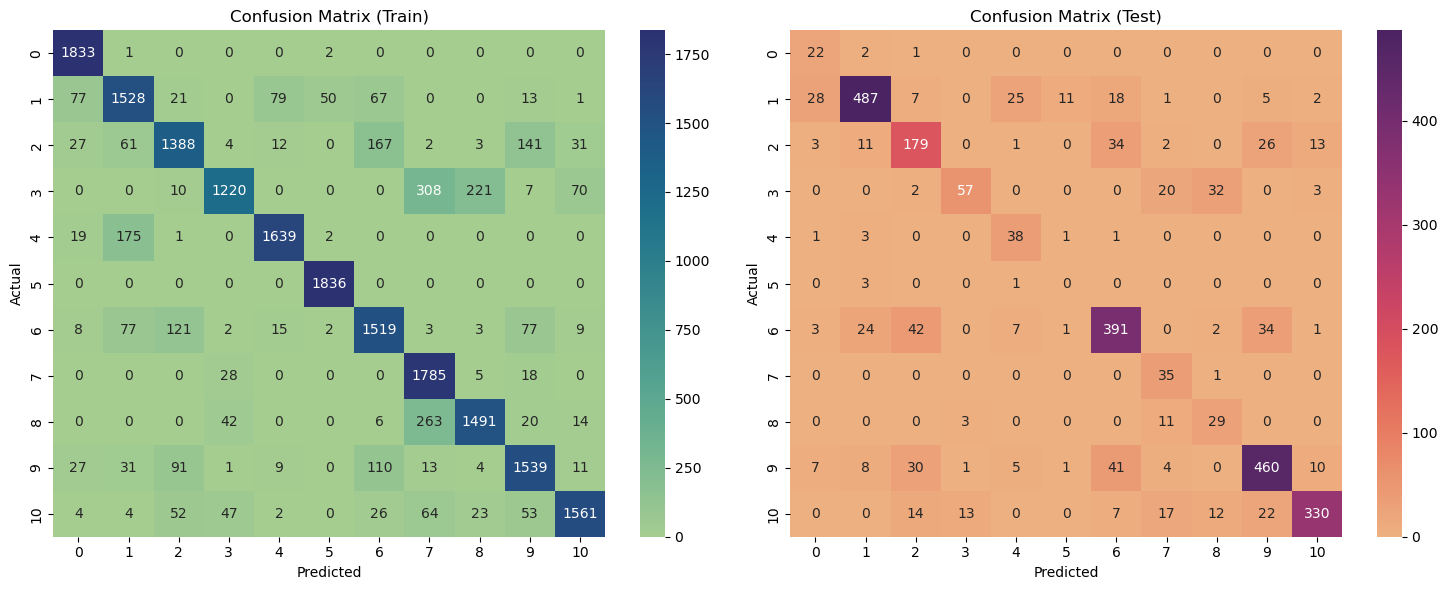

In [313]:
# Evaluate the model
evaluate_deep_model(model, x_train_mm.values, y_train_smt.values, x_test_mm.values, y_test.values)

In [321]:
#hyper parameter tuning for ANN
def create_model(dropout_rate, neurons):
    model = Sequential([
            Dense(30, activation='relu', input_dim=x_train_mm.shape[1]),
            Dropout(0.3),
            Dense(30, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ])
    
    model.compile(optimizer=Adam(learning_rate=0.0001),
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

    return model

model=KerasClassifier(model=create_model, epochs=10, batch_size=10, verbose=0, loss="sparse_categorical_crossentropy", optimizer="SGD")

param_grid = dict(model__dropout_rate=[0.1,0.2],optimizer__learning_rate=[0.1, 0.001],model__neurons=[50,80])

  
grid= GridSearchCV(estimator=model, param_grid=param_grid,cv=3,n_jobs=1,scoring='accuracy') 
  
# fitting the model for grid search 
grid.fit(x_train_mm, y_train_smt)

# print best parameter after tuning 
print(grid.best_params_) 

{'model__dropout_rate': 0.2, 'model__neurons': 80, 'optimizer__learning_rate': 0.1}

In [323]:
#after hyperparamater tuning
model=build_deep_model(x_train_mm.shape[1], len(np.unique(y_train_smt)), hidden_units=80, dropout_rate=0.2, learning_rate=0.001)

#train the model
model, history = train_deep_model(model, x_train_mm.values, y_train_smt.values, x_val_mm.values, y_val.values, epochs=10, batch_size=32)

Epoch 1/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 334us/step - accuracy: 0.3815 - loss: 1.7464 - val_accuracy: 0.6144 - val_loss: 1.1057
Epoch 2/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.6676 - loss: 0.9264 - val_accuracy: 0.6580 - val_loss: 0.9559
Epoch 3/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - accuracy: 0.7176 - loss: 0.7893 - val_accuracy: 0.7271 - val_loss: 0.7951
Epoch 4/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.7569 - loss: 0.6882 - val_accuracy: 0.7324 - val_loss: 0.7506
Epoch 5/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - accuracy: 0.7767 - loss: 0.6303 - val_accuracy: 0.7396 - val_loss: 0.7310
Epoch 6/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 275us/step - accuracy: 0.7911 - loss: 0.5858 - val_accuracy: 0.7607 - val_loss: 0.6865
Epoch 7/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step - accuracy: 0.8077 - loss: 0.5560 - val_accuracy: 0.7751 - val_loss: 0.6655
Epoch 8/10
632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step - accuracy: 0.8167 - loss: 0.5262 - 

632/632 ━━━━━━━━━━━━━━━━━━━━ 0s 186us/step
82/82 ━━━━━━━━━━━━━━━━━━━━ 0s 179us/step


******************************* Training Data Analysis *******************************

[Train] Classification Report

precision    recall  f1-score   support

           0       0.95      1.00      0.97      1836
           1       0.87      0.83      0.85      1836
           2       0.78      0.81      0.79      1836
           3       0.89      0.74      0.81      1836
           4       0.94      0.94      0.94      1836
           5       0.99      1.00      0.99      1836
           6       0.87      0.76      0.81      1836
           7       0.86      0.89      0.87      1836
           8       0.80      0.93      0.86      1836
           9       0.81      0.88      0.84      1836
          10       0.91      0.87      0.89      1836

    accuracy                           0.88     20196
   macro avg       0.88      0.88      0.88     20196
weighted avg       0.88      0.88      0.88     20196

Training Accuracy: 0.8762131115072291

******************************* Test Data Analysis *******************************

[Test] Classification Report

precision    recall  f1-score   support

           0       0.48      0.84      0.61        25
           1       0.92      0.84      0.87       584
           2       0.61      0.72      0.66       269
           3       0.73      0.61      0.66       114
           4       0.51      0.93      0.66        44
           5       0.00      0.00      0.00         4
           6       0.88      0.73      0.80       505
           7       0.47      0.75      0.58        36
           8       0.37      0.72      0.49        43
           9       0.82      0.86      0.84       567
          10       0.91      0.83      0.87       415

    accuracy                           0.80      2606
   macro avg       0.61      0.71      0.64      2606
weighted avg       0.82      0.80      0.80      2606

Testing Accuracy: 0.79623944742901

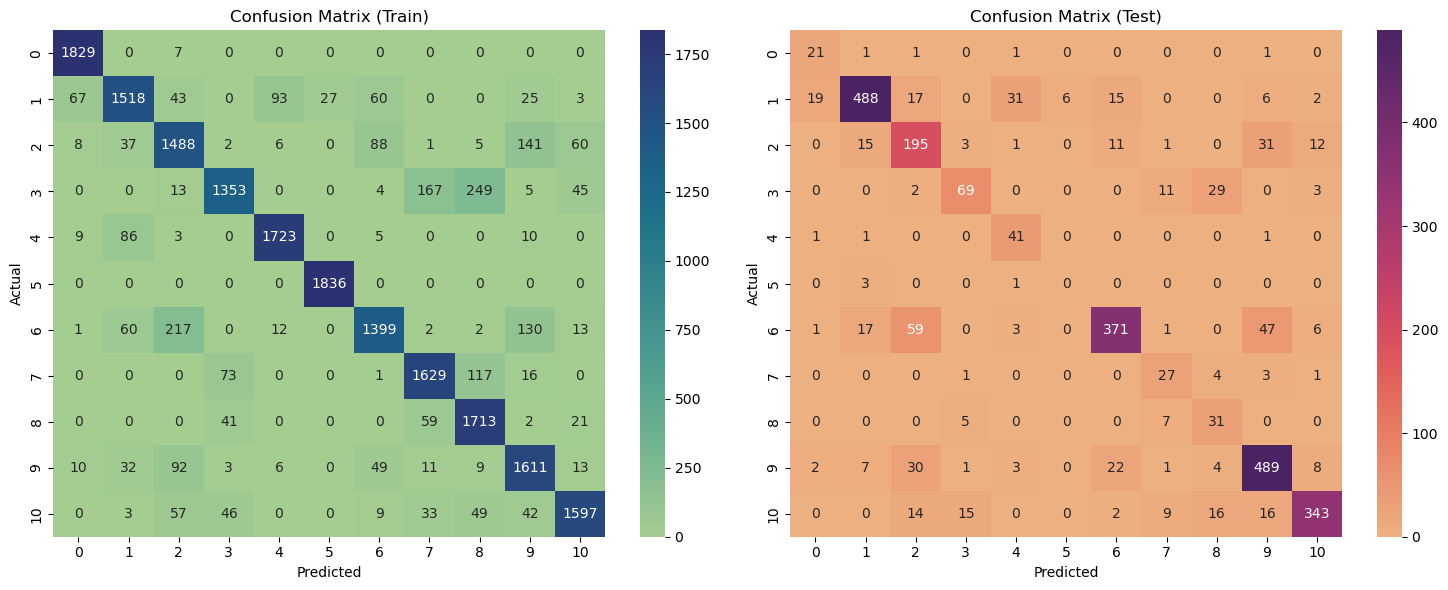

In [325]:
#evaluate the model
evaluate_deep_model(model, x_train_mm.values, y_train_smt.values, x_test_mm.values, y_test.values)

### Model 4: An ensemble model that combines the top 3 best-performing models

In [81]:
#hyperparamter tuning for SVM
param_grid = {'C': [0.1, 1],  
              'gamma': [1, 0.01, 0.001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=3) 
  
# fitting the model for grid search 
grid.fit(x_train_mm, y_train_smt) 

# print best parameter after tuning 
print(grid.best_params_) 


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.878 total time=   6.1s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.887 total time=   6.4s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.895 total time=   6.7s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.565 total time=  11.6s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.572 total time=  11.6s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.560 total time=  11.6s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.520 total time=  13.0s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.523 total time=  12.9s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.513 total time=  13.1s
[CV 1/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.959 total time=   3.7s
[CV 2/3] END ..........C=1, gamma=1, kernel=rbf;, score=0.964 total time=   3.8s
[CV 3/3] END ..........C=1, gamma=1, kernel=rbf;,

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [87]:
#fit best hyperparams from CV to train model
svm_hyper_clf = train_model(SVC, x_train_mm, y_train_smt, dict(kernel="rbf",C=1,gamma=1))

******************************* Training Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel with best hyperparams on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       0.99      0.99      0.99      1836
           2       0.98      0.99      0.98      1836
           3       1.00      0.99      1.00      1836
           4       0.99      1.00      1.00      1836
           5       1.00      1.00      1.00      1836
           6       0.99      0.98      0.98      1836
           7       1.00      1.00      1.00      1836
           8       1.00      1.00      1.00      1836
           9       0.99      0.99      0.99      1836
          10       1.00      0.99      0.99      1836

    accuracy                           0.99     20196
   macro avg       0.99      0.99      0.99     20196
weighted avg       0.99      0.99      0.99     20196

Accuracy score of SVM Classifer with Non-Linear kernel with best hyperparams on training data is: 
0.9931669637551991

******************************* Test Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel with best hyperparams on test data is:

precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.93      0.95      0.94       584
           2       0.77      0.80      0.78       269
           3       0.88      0.85      0.87       114
           4       0.76      0.80      0.78        44
           5       0.00      0.00      0.00         4
           6       0.89      0.89      0.89       505
           7       0.72      0.78      0.75        36
           8       0.72      0.67      0.70        43
           9       0.92      0.92      0.92       567
          10       0.95      0.92      0.93       415

    accuracy                           0.89      2606
   macro avg       0.77      0.75      0.76      2606
weighted avg       0.89      0.89      0.89      2606

Accuracy score of SVM Classifer with Non-Linear kernel with best hyperparams on test data is: 0.8933231005372217

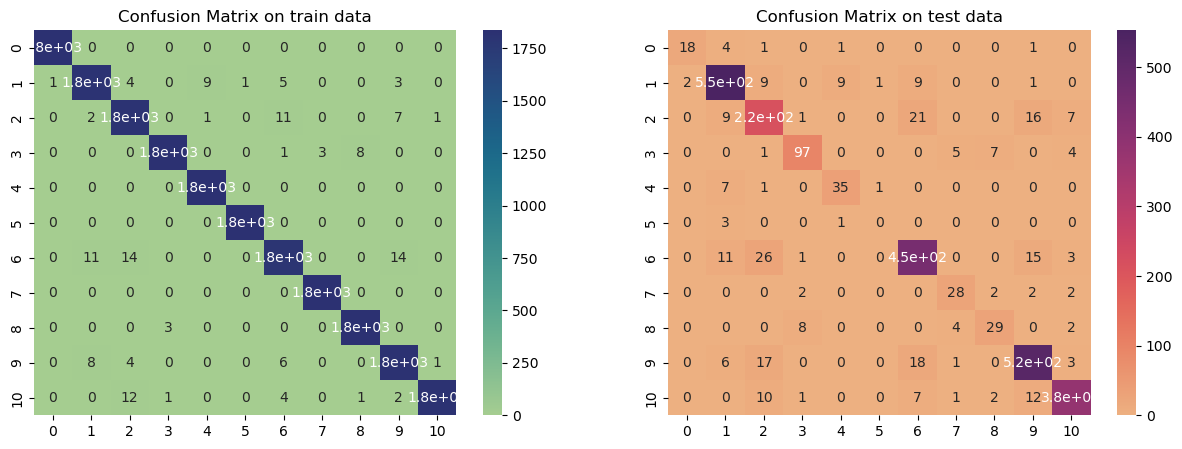

In [89]:
svm_train_pred,svm_test_pred=predict_and_report(svm_hyper_clf,'SVM Classifer with Non-Linear kernel with best hyperparams', x_train_mm, y_train_smt, x_test_mm, y_test)

In [328]:
#without hyperparams to SVM train model
svm_clf = train_model(SVC, x_train_mm, y_train_smt, dict(kernel="rbf"))

******************************* Training Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel on training data is:

precision    recall  f1-score   support

           0       0.99      1.00      1.00      1836
           1       0.96      0.95      0.96      1836
           2       0.95      0.95      0.95      1836
           3       0.98      0.96      0.97      1836
           4       0.98      0.99      0.99      1836
           5       0.99      1.00      1.00      1836
           6       0.95      0.94      0.95      1836
           7       0.98      0.99      0.99      1836
           8       0.98      1.00      0.99      1836
           9       0.96      0.97      0.96      1836
          10       0.99      0.97      0.98      1836

    accuracy                           0.98     20196
   macro avg       0.98      0.98      0.98     20196
weighted avg       0.98      0.98      0.98     20196

Accuracy score of SVM Classifer with Non-Linear kernel on training data is: 0.9750940780352545

******************************* Test Data Analysis *******************************

Classification report of SVM Classifer with Non-Linear kernel on test data is:

precision    recall  f1-score   support

           0       0.77      0.80      0.78        25
           1       0.93      0.92      0.93       584
           2       0.75      0.78      0.76       269
           3       0.86      0.79      0.82       114
           4       0.70      0.86      0.78        44
           5       0.00      0.00      0.00         4
           6       0.89      0.87      0.88       505
           7       0.63      0.75      0.68        36
           8       0.67      0.77      0.72        43
           9       0.90      0.91      0.91       567
          10       0.95      0.92      0.93       415

    accuracy                           0.88      2606
   macro avg       0.73      0.76      0.74      2606
weighted avg       0.88      0.88      0.88      2606

Accuracy score of SVM Classifer with Non-Linear kernel on test data is: 0.8791250959324636

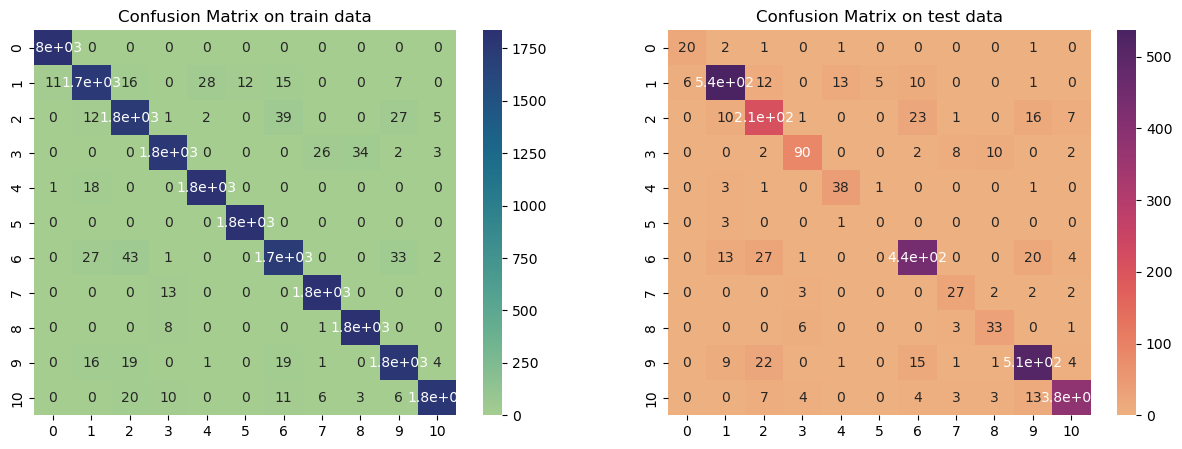

In [329]:
svm_train_pred,svm_test_pred=predict_and_report(svm_clf,'SVM Classifer with Non-Linear kernel', x_train_mm, y_train_smt, x_test_mm, y_test)

******************************* Training Data Analysis *******************************

Classification report of Random Forest Classifier on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00      1836
           2       1.00      1.00      1.00      1836
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1836
           5       1.00      1.00      1.00      1836
           6       1.00      1.00      1.00      1836
           7       1.00      1.00      1.00      1836
           8       1.00      1.00      1.00      1836
           9       1.00      1.00      1.00      1836
          10       1.00      1.00      1.00      1836

    accuracy                           1.00     20196
   macro avg       1.00      1.00      1.00     20196
weighted avg       1.00      1.00      1.00     20196

Accuracy score of Random Forest Classifier on training data is: 1.0

******************************* Test Data Analysis *******************************

Classification report of Random Forest Classifier on test data is:

precision    recall  f1-score   support

           0       0.79      0.76      0.78        25
           1       0.90      0.94      0.92       584
           2       0.79      0.73      0.76       269
           3       0.88      0.81      0.84       114
           4       0.85      0.80      0.82        44
           5       0.00      0.00      0.00         4
           6       0.88      0.87      0.88       505
           7       0.68      0.69      0.68        36
           8       0.78      0.67      0.72        43
           9       0.87      0.93      0.90       567
          10       0.93      0.89      0.91       415

    accuracy                           0.88      2606
   macro avg       0.76      0.74      0.75      2606
weighted avg       0.87      0.88      0.87      2606

Accuracy score of Random Forest Classifier on test data is: 0.875287797390637

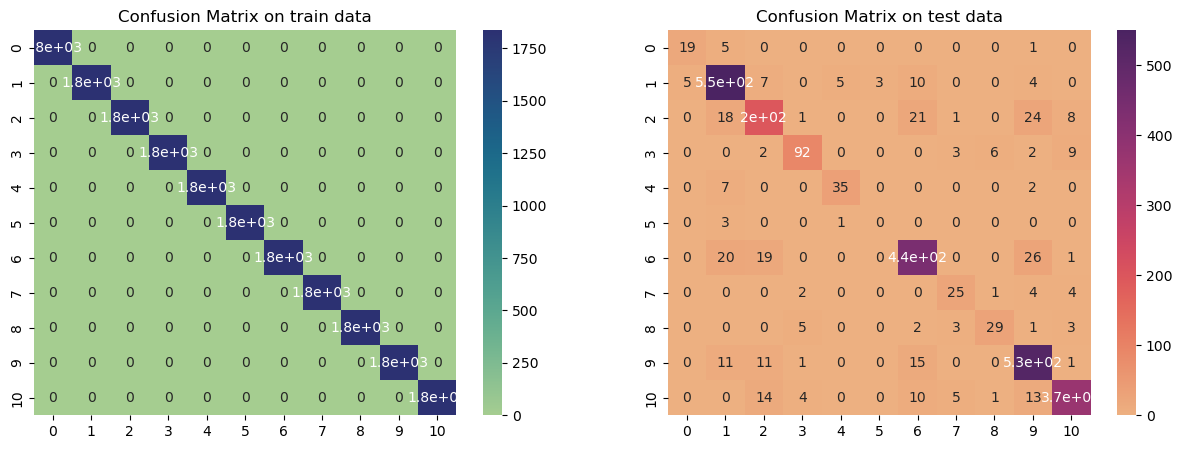

In [332]:
#RFClassifier
rf_model = train_model(RandomForestClassifier, x_train_mm, y_train_smt, dict())
rf_train_pred,rf_test_pred=predict_and_report(rf_model,'Random Forest Classifier', x_train_mm, y_train_smt, x_test_mm, y_test)

In [344]:
#train ensemble for 
params = dict(n_estimators= 2000,
     max_depth= 4,                        
     subsample=0.8)
x_train = np.column_stack((xgb_train_pred, svm_train_pred, rf_train_pred))
ens_model = train_model(GradientBoostingClassifier, x_train, y_train_smt, params)

### Model 4: An ensemble model evaluation

******************************* Training Data Analysis *******************************

Classification report of Ensemble model on training data is:

precision    recall  f1-score   support

           0       1.00      1.00      1.00      1836
           1       1.00      1.00      1.00      1836
           2       1.00      1.00      1.00      1836
           3       1.00      1.00      1.00      1836
           4       1.00      1.00      1.00      1836
           5       1.00      1.00      1.00      1836
           6       1.00      1.00      1.00      1836
           7       1.00      1.00      1.00      1836
           8       1.00      1.00      1.00      1836
           9       1.00      1.00      1.00      1836
          10       1.00      1.00      1.00      1836

    accuracy                           1.00     20196
   macro avg       1.00      1.00      1.00     20196
weighted avg       1.00      1.00      1.00     20196

Accuracy score of Ensemble model on training data is: 1.0

******************************* Test Data Analysis *******************************

Classification report of Ensemble model on test data is:

precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.90      0.94      0.92       584
           2       0.80      0.77      0.78       269
           3       0.86      0.81      0.83       114
           4       0.87      0.77      0.82        44
           5       0.00      0.00      0.00         4
           6       0.89      0.88      0.89       505
           7       0.82      0.78      0.80        36
           8       0.81      0.67      0.73        43
           9       0.89      0.93      0.91       567
          10       0.92      0.91      0.91       415

    accuracy                           0.88      2606
   macro avg       0.78      0.75      0.76      2606
weighted avg       0.88      0.88      0.88      2606

Accuracy score of Ensemble model on test data is: 0.8848810437452034

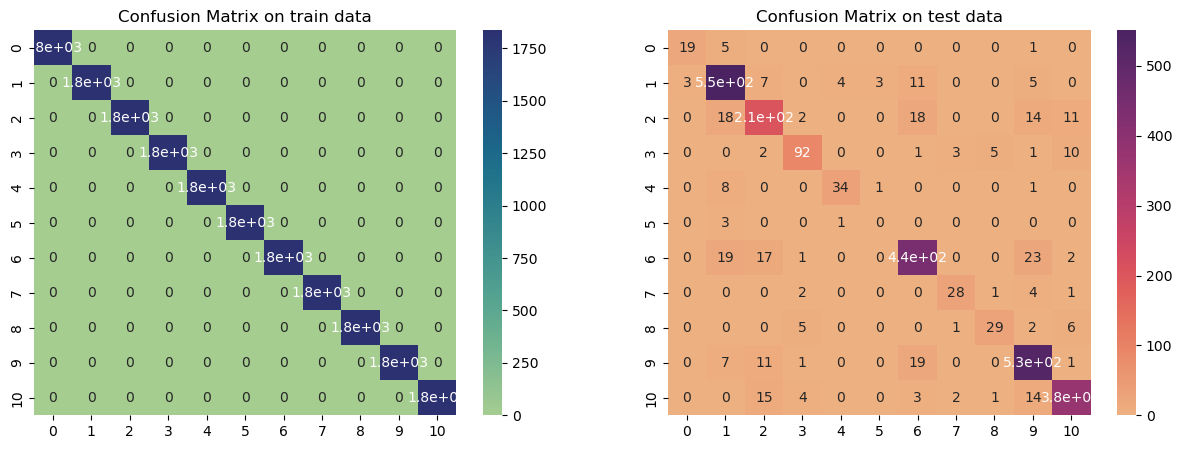

In [347]:
x_test = np.column_stack((xgb_test_pred, svm_test_pred, rf_test_pred))
ens_pred=predict_and_report(ens_model,'Ensemble model', x_train, y_train_smt, x_test, y_test)

In [353]:
print(cross_val_score(ens_model, x_test, y_test, scoring='accuracy', cv=KFold(n_splits=5)))

[0.88697318 0.88483685 0.88675624 0.87140115 0.88675624]

### Conclusion:

Though both XGBoost and ensemble method give 88% accuracy on test data but have 100% accuracy on
training data, so the model is very generalised i.e. the model has learned patterns so broadly that it struggles
to accurately predict specific details or nuances in new data. Hence, the best model for this dataset is SVM
using non-linear kernel which gives a training accuracy of 97% and testng accuracy of 87%.